#**Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных**

**Цель лабораторной работы**\
Изучение способов предварительной обработки данных для дальнейшего формирования моделей

**Задание**


1.   Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2.   Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:

  *   обработку пропусков в данных;
  *   кодирование категориальных признаков;
  *   масштабирование данных.



##**Решение**

###**Импорт библиотек**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
%matplotlib inline 
sns.set(style="ticks")

In [5]:
data = pd.read_csv('data.csv')

###**Характеристики датасета**

In [6]:
data.shape

(18207, 89)

In [7]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [8]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

###**Обработка пропусков в числовых данных**



####**Подбор и преобразование колонки**

In [10]:
data['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [11]:
data[data['Release Clause'].isnull()].head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,28,198710,J. Rodríguez,26,https://cdn.sofifa.org/players/4/19/198710.png,Colombia,https://cdn.sofifa.org/flags/56.png,88,89,FC Bayern München,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,91,187961,Paulinho,29,https://cdn.sofifa.org/players/4/19/187961.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Guangzhou Evergrande Taobao FC,...,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,166,212523,Anderson Talisca,24,https://cdn.sofifa.org/players/4/19/212523.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,90,Guangzhou Evergrande Taobao FC,...,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,176,207410,M. Kovačić,24,https://cdn.sofifa.org/players/4/19/207410.png,Croatia,https://cdn.sofifa.org/flags/10.png,83,89,Chelsea,...,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN


In [12]:
data[data['Release Clause'].isnull()].index

Int64Index([   28,    38,    91,   166,   176,   332,   354,   357,   427,
              434,
            ...
            17634, 17672, 17726, 17752, 17978, 17979, 18026, 18031, 18056,
            18183],
           dtype='int64', length=1564)

In [13]:
#форматируем значения
release_clause = data['Release Clause'].fillna('0').replace({'€':'','K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
release_clause.rename('Release Clause')
release_clause.rename_axis("animal")
release_clause

0        226500000
1        127100000
2        228100000
3        138600000
4        196400000
           ...    
18202       143000
18203       113000
18204       165000
18205       143000
18206       165000
Name: Release Clause, Length: 18207, dtype: int64

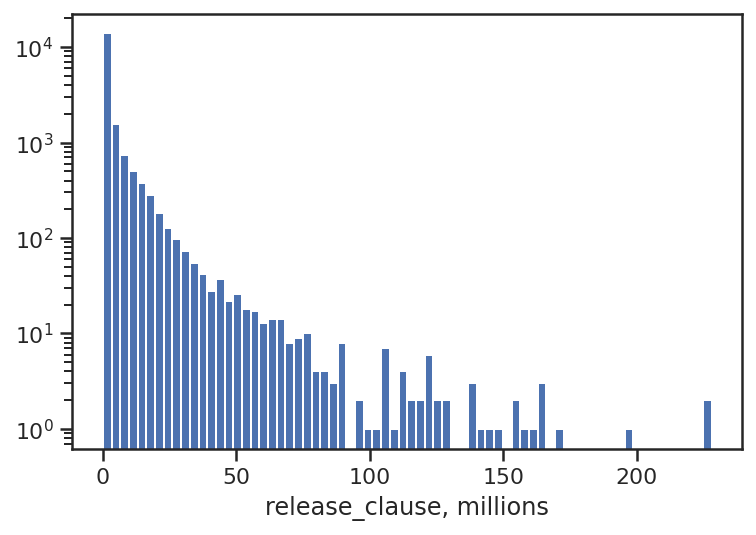

In [14]:
plt.hist(release_clause.divide(other=1e6), 70,log=True)
plt.xlabel("release_clause, millions")
plt.show()

####**Заполнение пропусков с помощью SimpleImputer**

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
# функция для применения различных стратегий импьютации для колонки
def test_num_impute(strategy_param, column, missing_val=np.nan):
    # фильтр для проверки заполнения пустых значений
    indicator = MissingIndicator(missing_values=missing_val)
    mask_missing_values_only = indicator.fit_transform(column)
    #SimpleImputer
    imp_num = SimpleImputer(strategy=strategy_param,missing_values=missing_val)
    data_num_imp = imp_num.fit_transform(column)
    return data_num_imp[mask_missing_values_only]

In [17]:
# функция для печати результатов вставки пропусков, используя список стратегий
def test_strategies(strategies,df,missing_val=np.nan):
    for index, strategy in enumerate(strategies):
        print(df.iloc[:,0].name,strategy,test_num_impute(strategy,df,missing_val))

In [18]:
# выводить массив с ..., если больше 100 значений
np.set_printoptions(threshold=100)

In [19]:
# фильтр для проверки заполнения пустых значений
indicator = MissingIndicator(missing_values=0)
mask_missing_values_only = indicator.fit_transform(release_clause.to_frame())
np.where(mask_missing_values_only)

(array([   28,    38,    91, ..., 18031, 18056, 18183]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [20]:
# характеристики признака
release_clause.describe()

count    1.820700e+04
mean     4.191200e+06
std      1.070778e+07
min      0.000000e+00
25%      3.920000e+05
50%      1.000000e+06
75%      3.000000e+06
max      2.281000e+08
Name: Release Clause, dtype: float64

In [21]:
# применение стратегий и вывод значений
strategies=['mean', 'median','most_frequent']
test_strategies(strategies,release_clause.to_frame(),0)

Release Clause mean [4585060.98185423 4585060.98185423 4585060.98185423 ... 4585060.98185423
 4585060.98185423 4585060.98185423]
Release Clause median [1100000. 1100000. 1100000. ... 1100000. 1100000. 1100000.]
Release Clause most_frequent [1100000 1100000 1100000 ... 1100000 1100000 1100000]


###**Обработка пропусков в категориальных данных**

####**Выбор колонки**

In [22]:
# поиск в процентах
total_count = len(data.index)
data.select_dtypes(include=['object']).isnull().sum(axis = 0).where(lambda x : x>0).sort_values(ascending=True).apply(lambda x: x/total_count*100).head(10)

Preferred Foot          0.263635
Work Rate               0.263635
Body Type               0.263635
Real Face               0.263635
Weight                  0.263635
Height                  0.263635
Position                0.329544
Club                    1.323667
Contract Valid Until    1.587302
Joined                  8.529686
dtype: float64

In [23]:
data['Club']

0               FC Barcelona
1                   Juventus
2        Paris Saint-Germain
3          Manchester United
4            Manchester City
                ...         
18202        Crewe Alexandra
18203         Trelleborgs FF
18204       Cambridge United
18205        Tranmere Rovers
18206        Tranmere Rovers
Name: Club, Length: 18207, dtype: object

In [24]:
# вывод информации об уникальных значениях
print('Club: число уникальных значений -', data['Club'].nunique(), ", количество пустых значений -", data['Club'].isnull().sum())

Club: число уникальных значений - 651 , количество пустых значений - 241


####**Заполнение пропусков в данных**

In [25]:
data[data['Club'].isnull()].index

Int64Index([  452,   538,   568,   677,   874,   953,   997,  1008,  1120,
             1271,
            ...
            16903, 16947, 16976, 17008, 17129, 17197, 17215, 17339, 17436,
            17539],
           dtype='int64', length=241)

In [26]:
# применение стратегий и вывод заполненных значений
strategies = ['most_frequent','constant']
test_strategies(strategies, data[['Club']])

Club most_frequent ['AS Monaco' 'AS Monaco' 'AS Monaco' ... 'AS Monaco' 'AS Monaco'
 'AS Monaco']
Club constant ['missing_value' 'missing_value' 'missing_value' ... 'missing_value'
 'missing_value' 'missing_value']


###**Преобразование категориальных признаков**

####**Поиск колонки для label encoding**

In [27]:
# поиск категориальных признаков, в которых мало уникальных значений
uniqueObj = data.select_dtypes(include=['object']).nunique().sort_values().head(5)
print(uniqueObj)

Preferred Foot     2
Real Face          2
Work Rate          9
Body Type         10
Height            21
dtype: int64


In [28]:
# вывод категориальных признаков с указанием уникальных значений
categoryCols = uniqueObj.index.tolist()
for col in data[categoryCols]:
    print(col, ":", data[col].unique(), ", количество пустых значений -", data[col].isnull().sum())


Preferred Foot : ['Left' 'Right' nan] , количество пустых значений - 48
Real Face : ['Yes' 'No' nan] , количество пустых значений - 48
Work Rate : ['Medium/ Medium' 'High/ Low' 'High/ Medium' 'High/ High' 'Medium/ High'
 'Medium/ Low' 'Low/ High' 'Low/ Medium' 'Low/ Low' nan] , количество пустых значений - 48
Body Type : ['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal' 'Courtois' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa' nan] , количество пустых значений - 48
Height : ["5'7" "6'2" "5'9" "6'4" "5'11" "5'8" "6'0" "5'6" "5'10" "6'6" "6'1" "5'4"
 "6'3" "5'5" "6'5" "6'7" "5'3" "5'2" "6'8" "5'1" "6'9" nan] , количество пустых значений - 48


In [29]:
# проверка на связь строк, в которых неопределенные значения, чтобы удалить их из датасета
data[(data[categoryCols[0]].isnull())][categoryCols].head()

,Preferred Foot,Real Face,Work Rate,Body Type,Height
13236,NaN,NaN,NaN,NaN,NaN
13237,NaN,NaN,NaN,NaN,NaN
13238,NaN,NaN,NaN,NaN,NaN
13239,NaN,NaN,NaN,NaN,NaN
13240,NaN,NaN,NaN,NaN,NaN


In [30]:
# удаляем эти строки, так как значения не определены во всех колонках
data = data[data[categoryCols[0]].notna()]
for col in data[categoryCols]:
    print(col,":", data[col].unique(), ", количество пустых значений -", data[col].isnull().sum())

Preferred Foot : ['Left' 'Right'] , количество пустых значений - 0
Real Face : ['Yes' 'No'] , количество пустых значений - 0
Work Rate : ['Medium/ Medium' 'High/ Low' 'High/ Medium' 'High/ High' 'Medium/ High'
 'Medium/ Low' 'Low/ High' 'Low/ Medium' 'Low/ Low'] , количество пустых значений - 0
Body Type : ['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal' 'Courtois' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa'] , количество пустых значений - 0
Height : ["5'7" "6'2" "5'9" "6'4" "5'11" "5'8" "6'0" "5'6" "5'10" "6'6" "6'1" "5'4"
 "6'3" "5'5" "6'5" "6'7" "5'3" "5'2" "6'8" "5'1" "6'9"] , количество пустых значений - 0


####**label encoding**

In [31]:
# импорт
from sklearn.preprocessing import LabelEncoder

In [32]:
# label encoding для выбранной колонки Work Rate
le = LabelEncoder()
work_rate = data["Work Rate"]
foot_le = le.fit_transform(work_rate)
print(work_rate.name, ", label encoded: ", foot_le, sep='')
print(work_rate.name, ", unique values: ", np.unique(foot_le), sep='')
print(work_rate.name, ", source values: ", le.inverse_transform(foot_le), sep='')

Work Rate, label encoded: [8 1 2 ... 8 8 8]
Work Rate, unique values: [0 1 2 3 4 5 6 7 8]
Work Rate, source values: ['Medium/ Medium' 'High/ Low' 'High/ Medium' ... 'Medium/ Medium'
 'Medium/ Medium' 'Medium/ Medium']


####**one hot encoding**

In [33]:
# one hot encoding для выбранной колонки Body Type
pd.get_dummies(data["Body Type"],dummy_na=True,prefix="Rate").head()

,Rate_Akinfenwa,Rate_C. Ronaldo,Rate_Courtois,Rate_Lean,Rate_Messi,Rate_Neymar,Rate_Normal,Rate_PLAYER_BODY_TYPE_25,Rate_Shaqiri,Rate_Stocky,Rate_nan
0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


###**Масштабирование данных**

####**Выбор колонки**

In [34]:
# выборка 10 количественных признаков с количеством уникальных значений меньше 100
quantityCols = data.select_dtypes(exclude=['object']).nunique().where(lambda x : x<100).sort_values(ascending=False).head(10)
print(quantityCols)

Jersey Number      99.0
Dribbling          94.0
Positioning        94.0
Finishing          93.0
ShotPower          92.0
Marking            92.0
LongShots          92.0
HeadingAccuracy    91.0
StandingTackle     90.0
FKAccuracy         90.0
dtype: float64


array([[<AxesSubplot:title={'center':'Jersey Number'}>,
        <AxesSubplot:title={'center':'Dribbling'}>,
        <AxesSubplot:title={'center':'Positioning'}>],
       [<AxesSubplot:title={'center':'Finishing'}>,
        <AxesSubplot:title={'center':'ShotPower'}>,
        <AxesSubplot:title={'center':'Marking'}>],
       [<AxesSubplot:title={'center':'LongShots'}>,
        <AxesSubplot:title={'center':'HeadingAccuracy'}>,
        <AxesSubplot:title={'center':'StandingTackle'}>],
       [<AxesSubplot:title={'center':'FKAccuracy'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

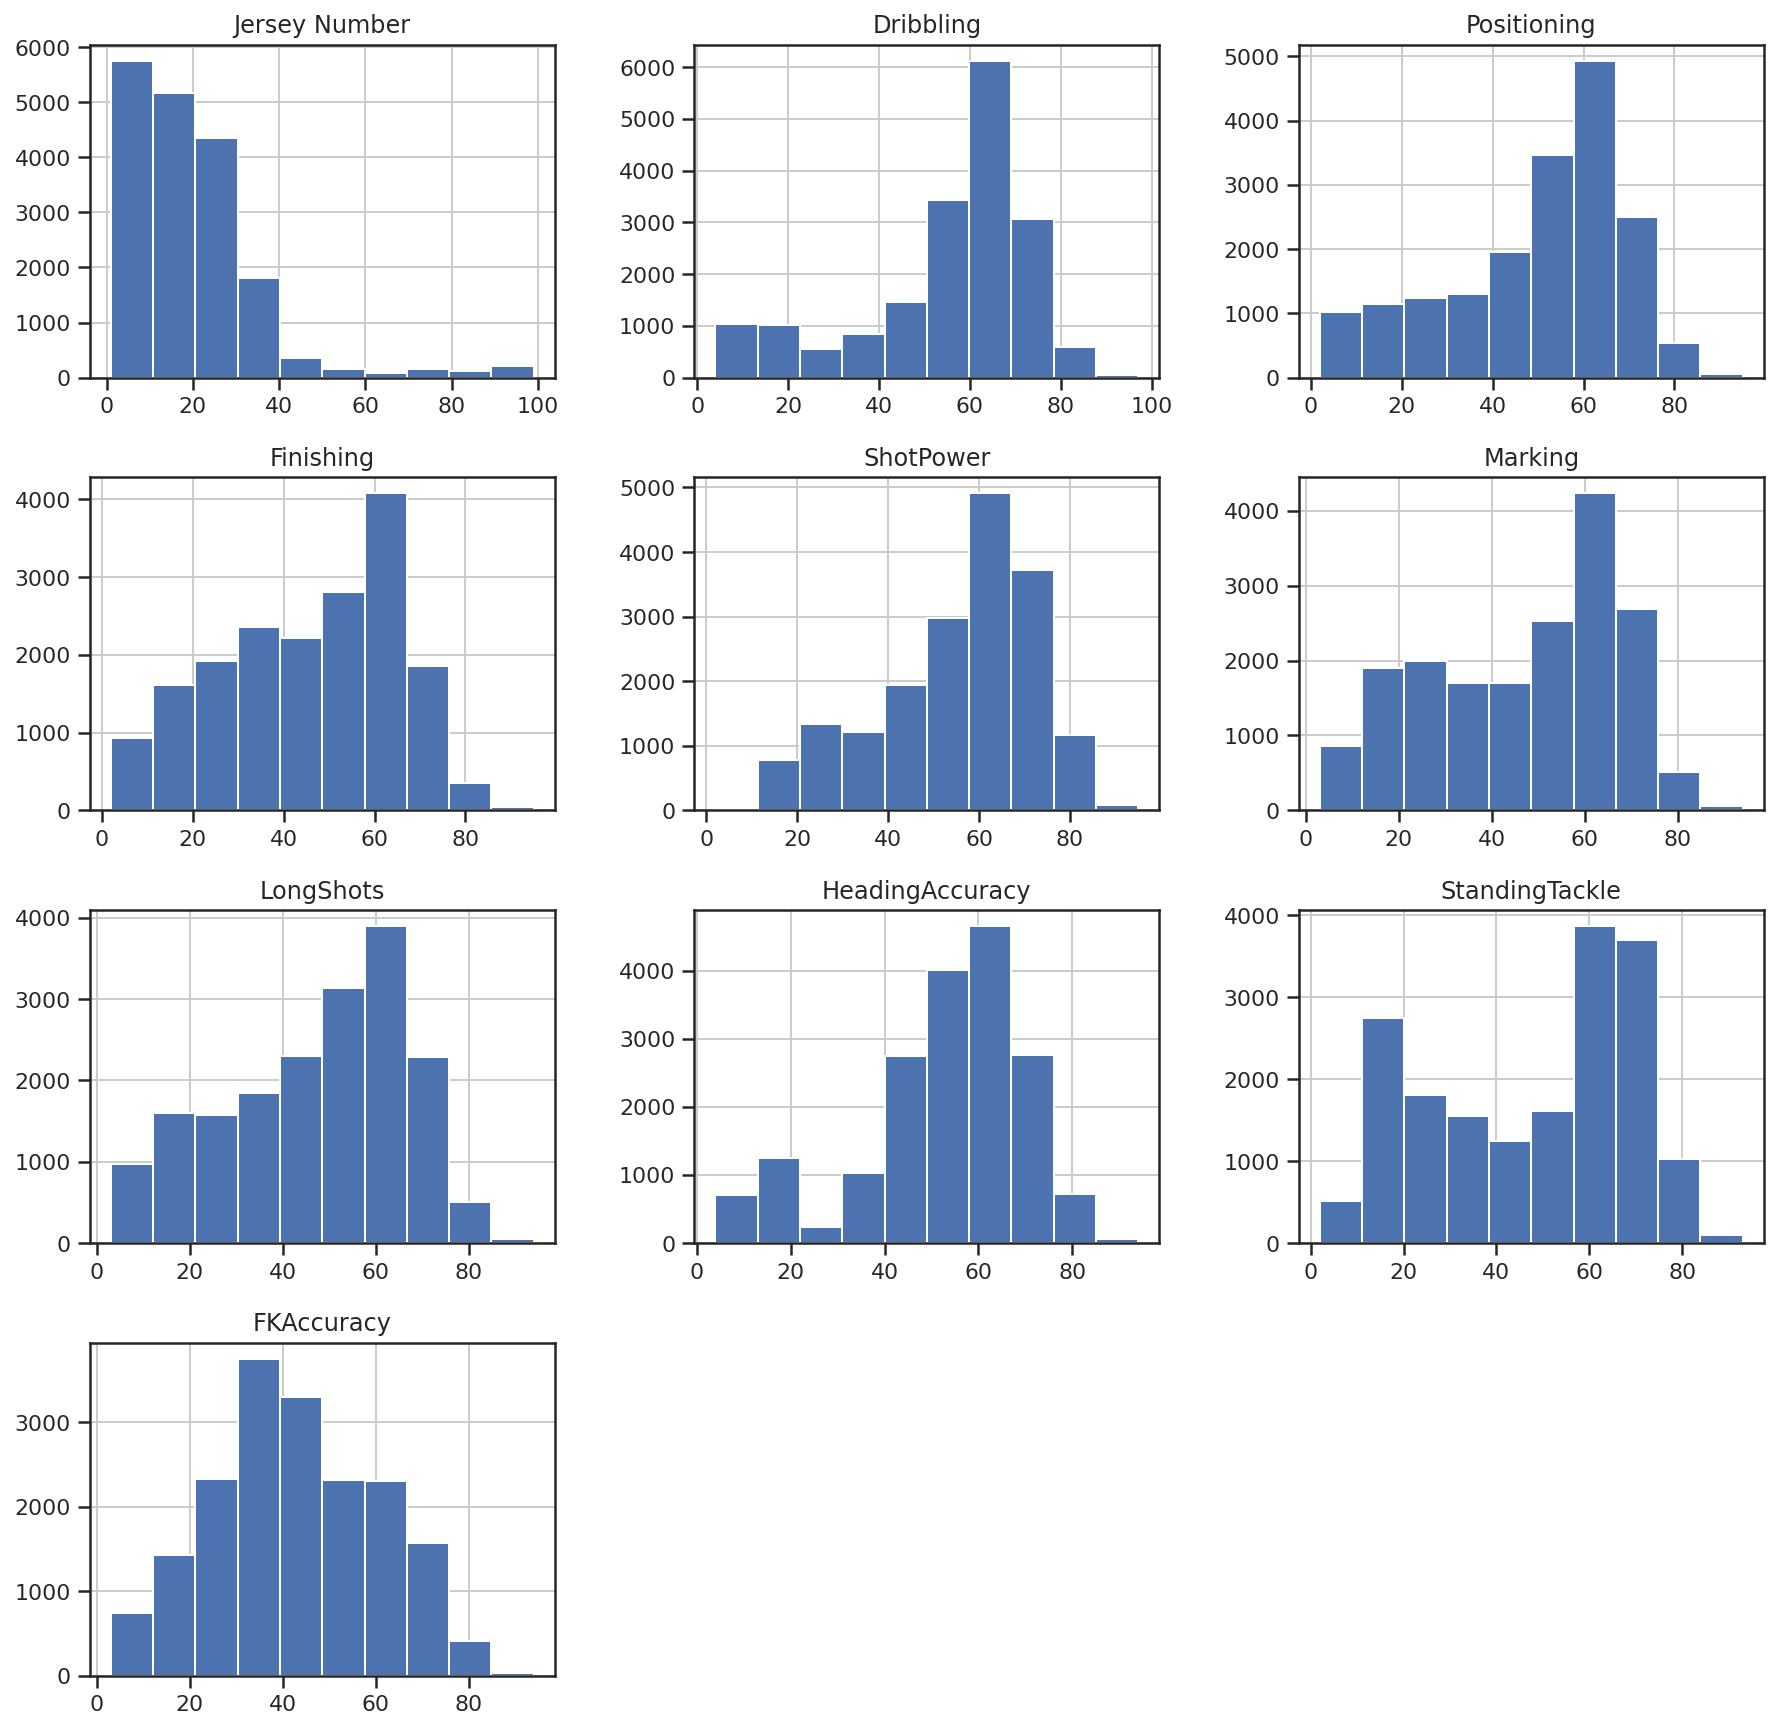

In [35]:
# гистограммы для этих признаков
data[quantityCols.index.tolist()].hist(figsize=(15,15))


####**Масштабирование различными признаками**

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

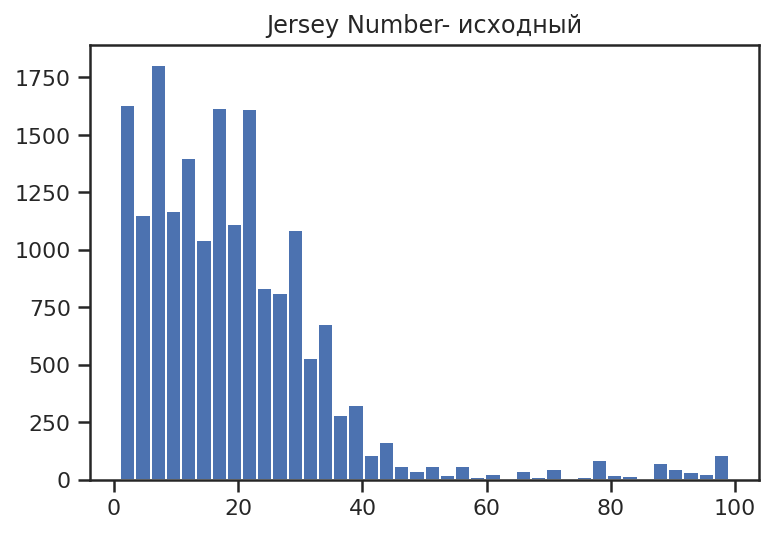

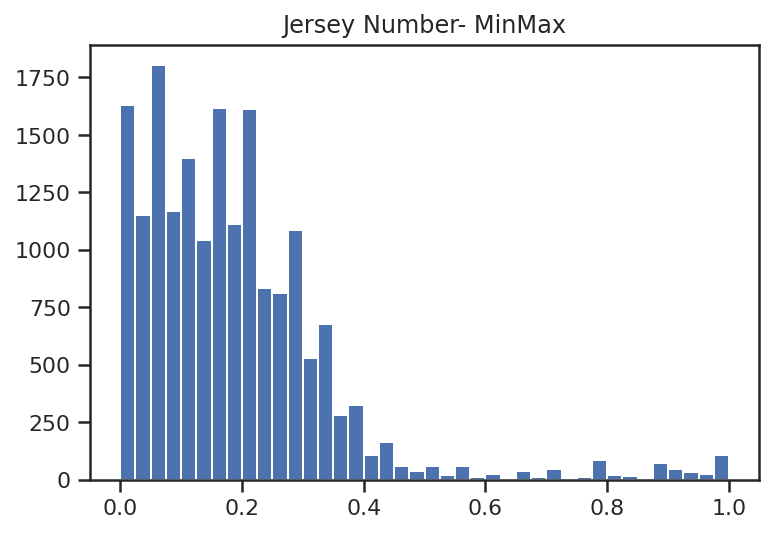

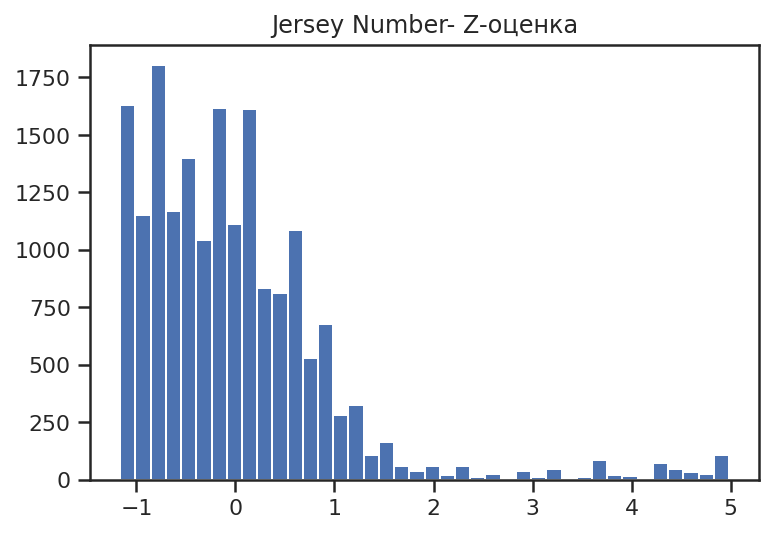

In [37]:
# выбранная колонка - Jersey Number

# MinMax масштабирование
mms = MinMaxScaler()
jersey_number = data['Jersey Number']
mms_acceleration = mms.fit_transform(jersey_number.to_frame())

# Масштабирование данных на основе Z-оценки
sts = StandardScaler()
sts_acceleration = sts.fit_transform(jersey_number.to_frame())

# Построение гистограмм
plt.hist(jersey_number,40)
plt.title(jersey_number.name+"- исходный")
plt.show()
plt.hist(mms_acceleration,40)
plt.title(jersey_number.name+"- MinMax")
plt.show()
plt.hist(sts_acceleration,40)
plt.title(jersey_number.name+"- Z-оценка")
plt.show()